<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ford-GoBike-System-Data" data-toc-modified-id="Ford-GoBike-System-Data-1">Ford GoBike System Data</a></span><ul class="toc-item"><li><span><a href="#by-Joel-Minier-Matar" data-toc-modified-id="by-Joel-Minier-Matar-1.1">by Joel Minier-Matar</a></span></li><li><span><a href="#Preliminary-Wrangling" data-toc-modified-id="Preliminary-Wrangling-1.2">Preliminary Wrangling</a></span><ul class="toc-item"><li><span><a href="#What-is-the-structure-of-your-dataset?" data-toc-modified-id="What-is-the-structure-of-your-dataset?-1.2.1">What is the structure of your dataset?</a></span></li><li><span><a href="#What-is/are-the-main-feature(s)-of-interest-in-your-dataset?" data-toc-modified-id="What-is/are-the-main-feature(s)-of-interest-in-your-dataset?-1.2.2">What is/are the main feature(s) of interest in your dataset?</a></span></li><li><span><a href="#What-features-in-the-dataset-do-you-think-will-help-support-your-investigation-into-your-feature(s)-of-interest?" data-toc-modified-id="What-features-in-the-dataset-do-you-think-will-help-support-your-investigation-into-your-feature(s)-of-interest?-1.2.3">What features in the dataset do you think will help support your investigation into your feature(s) of interest?</a></span></li></ul></li><li><span><a href="#Univariate-Exploration" data-toc-modified-id="Univariate-Exploration-1.3">Univariate Exploration</a></span><ul class="toc-item"><li><span><a href="#Discuss-the-distribution(s)-of-your-variable(s)-of-interest.-Were-there-any-unusual-points?-Did-you-need-to-perform-any-transformations?" data-toc-modified-id="Discuss-the-distribution(s)-of-your-variable(s)-of-interest.-Were-there-any-unusual-points?-Did-you-need-to-perform-any-transformations?-1.3.1">Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?</a></span></li><li><span><a href="#Of-the-features-you-investigated,-were-there-any-unusual-distributions?-Did-you-perform-any-operations-on-the-data-to-tidy,-adjust,-or-change-the-form-of-the-data?-If-so,-why-did-you-do-this?" data-toc-modified-id="Of-the-features-you-investigated,-were-there-any-unusual-distributions?-Did-you-perform-any-operations-on-the-data-to-tidy,-adjust,-or-change-the-form-of-the-data?-If-so,-why-did-you-do-this?-1.3.2">Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?</a></span></li></ul></li><li><span><a href="#Bivariate-Exploration" data-toc-modified-id="Bivariate-Exploration-1.4">Bivariate Exploration</a></span><ul class="toc-item"><li><span><a href="#Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-How-did-the-feature(s)-of-interest-vary-with-other-features-in-the-dataset?" data-toc-modified-id="Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-How-did-the-feature(s)-of-interest-vary-with-other-features-in-the-dataset?-1.4.1">Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?</a></span></li><li><span><a href="#Did-you-observe-any-interesting-relationships-between-the-other-features-(not-the-main-feature(s)-of-interest)?" data-toc-modified-id="Did-you-observe-any-interesting-relationships-between-the-other-features-(not-the-main-feature(s)-of-interest)?-1.4.2">Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?</a></span></li></ul></li><li><span><a href="#Multivariate-Exploration" data-toc-modified-id="Multivariate-Exploration-1.5">Multivariate Exploration</a></span><ul class="toc-item"><li><span><a href="#Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-Were-there-features-that-strengthened-each-other-in-terms-of-looking-at-your-feature(s)-of-interest?" data-toc-modified-id="Talk-about-some-of-the-relationships-you-observed-in-this-part-of-the-investigation.-Were-there-features-that-strengthened-each-other-in-terms-of-looking-at-your-feature(s)-of-interest?-1.5.1">Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?</a></span></li><li><span><a href="#Were-there-any-interesting-or-surprising-interactions-between-features?" data-toc-modified-id="Were-there-any-interesting-or-surprising-interactions-between-features?-1.5.2">Were there any interesting or surprising interactions between features?</a></span></li></ul></li></ul></li></ul></div>

# Ford GoBike System Data
## by Joel Minier-Matar

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [266]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import os
import zipfile
import requests, zipfile, io
from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

Downloading dataset programmatically in case we need to add additional files in the future and storing the filenames in a list to load it into Pandas

In [265]:

#Data source: https://www.lyft.com/bikes/bay-wheels/system-data
data_to_download=['201904','201905','201906','201907','201908','201909','201910','201911','201912','202001','202002','202003']
for file_date in data_to_download:
    if int(file_date)<201905: #adjusting filenames to account for file name change
        name='fordgobike'
    else:
        name='baywheels'
    url='https://s3.amazonaws.com/baywheels-data/'+file_date+'-'+name+'-tripdata.csv.zip'
    data_file = requests.get(url)
    zip_data = zipfile.ZipFile(io.BytesIO(data_file.content))
    zip_data.extractall("data")
    print(url.split('/')[-1][:-4])#printing the filename to track the downloaded files



201904-fordgobike-tripdata.csv
201905-baywheels-tripdata.csv
201906-baywheels-tripdata.csv
201907-baywheels-tripdata.csv


ConnectionError: HTTPSConnectionPool(host='s3.amazonaws.com', port=443): Max retries exceeded with url: /baywheels-data/201908-baywheels-tripdata.csv.zip (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fa47a03e0d0>: Failed to establish a new connection: [Errno 60] Operation timed out'))

In [288]:
#creating filename list to load files into pandas
data_to_download=['201904','201905','201906','201907','201908','201909','201910','201911','201912','202001','202002','202003']
filenames=[]
for file_date in data_to_download:
    if int(file_date)<201905: #adjusting filenames to account for file name change
        name='fordgobike'
    else:
        name='baywheels'
    filenames.append(file_date+'-'+name+'-tripdata.csv')
filenames


['201904-fordgobike-tripdata.csv',
 '201905-baywheels-tripdata.csv',
 '201906-baywheels-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201908-baywheels-tripdata.csv',
 '201909-baywheels-tripdata.csv',
 '201910-baywheels-tripdata.csv',
 '201911-baywheels-tripdata.csv',
 '201912-baywheels-tripdata.csv',
 '202001-baywheels-tripdata.csv',
 '202002-baywheels-tripdata.csv',
 '202003-baywheels-tripdata.csv']

In [289]:
#loading all the data files into a single dataframe
df=pd.DataFrame()
for name in filenames:    
    data=pd.read_csv("data/"+name)
    df=pd.concat([df,data])
    
df.info()

/Users/jmmk/opt/anaconda3/envs/Udacity/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jmmk/opt/anaconda3/envs/Udacity/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jmmk/opt/anaconda3/envs/Udacity/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2780197 entries, 0 to 176798
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 339.4+ MB


In [324]:
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id            566370
start_station_name          564536
start_station_latitude           0
start_station_longitude          0
end_station_id              568018
end_station_name            566192
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip    1148266
rental_access_method       2041501
dtype: int64

In [325]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.780197e+06,2.213827e+06,2.780197e+06,2.780197e+06,2.212179e+06,2.780197e+06,2.780197e+06,2.780197e+06
mean,8.166443e+02,1.544218e+02,3.775789e+01,-1.223509e+02,1.494351e+02,3.775695e+01,-1.223467e+02,1.365178e+05
std,1.899538e+03,1.300140e+02,1.783507e-01,4.679862e-01,1.289548e+02,2.707893e-01,8.093102e-01,2.511721e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225758e+02,4.000000e+00
25%,3.690000e+02,5.000000e+01,3.776710e+01,-1.224167e+02,4.300000e+01,3.776811e+01,-1.224147e+02,2.299000e+03
50%,5.880000e+02,1.090000e+02,3.777874e+01,-1.224000e+02,1.040000e+02,3.777877e+01,-1.223991e+02,9.787000e+03
75%,9.150000e+02,2.470000e+02,3.779423e+01,-1.223898e+02,2.440000e+02,3.779455e+01,-1.223898e+02,1.514520e+05
max,9.121100e+05,5.210000e+02,4.551000e+01,0.000000e+00,5.210000e+02,4.551000e+01,0.000000e+00,9.999600e+05


In [335]:
df.duration_sec.quantile(0.99)

4060.0

In [341]:
df[df['duration_sec']>=4060].count()

duration_sec               27803
start_time                 27803
end_time                   27803
start_station_id           23092
start_station_name         23108
start_station_latitude     27803
start_station_longitude    27803
end_station_id             22568
end_station_name           22587
end_station_latitude       27803
end_station_longitude      27803
bike_id                    27803
user_type                  27803
bike_share_for_all_trip    16732
rental_access_method        6356
dtype: int64

The `bike_share_for_all_trip` and `rental_access_method` columns have some missing values to keep in mind while analyzing the data


Cleaning points
- remove entries with durations above the 95 percentile (1803 sec)
- Convert `start time` and `end_time` to timestamp
- add start months and year

Making a copy of the database

In [339]:
df_clean=df.copy()

In [340]:
df_clean=df_clean[df_clean['duration_sec']<=4060]
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.752401e+06,2.190740e+06,2.752401e+06,2.752401e+06,2.189616e+06,2.752401e+06,2.752401e+06,2.752401e+06
mean,7.138244e+02,1.539936e+02,3.775783e+01,-1.223507e+02,1.486301e+02,3.775768e+01,-1.223491e+02,1.367143e+05
std,5.182559e+02,1.295616e+02,1.788484e-01,4.692365e-01,1.282719e+02,2.069899e-01,5.781337e-01,2.513152e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.670000e+02,5.000000e+01,3.776710e+01,-1.224165e+02,4.300000e+01,3.776794e+01,-1.224139e+02,2.299000e+03
50%,5.830000e+02,1.090000e+02,3.777874e+01,-1.223998e+02,1.040000e+02,3.777877e+01,-1.223991e+02,9.789000e+03
75%,9.010000e+02,2.460000e+02,3.779416e+01,-1.223896e+02,2.430000e+02,3.779450e+01,-1.223896e+02,1.530070e+05
max,4.060000e+03,5.210000e+02,4.551000e+01,0.000000e+00,5.210000e+02,4.551000e+01,0.000000e+00,9.999600e+05


In [342]:
df_clean.start_time=pd.to_datetime(df_clean.start_time)
df_clean.end_time=pd.to_datetime(df_clean.end_time)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752401 entries, 4 to 176798
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 336.0+ MB


Adding a column with the month and year of the entry. That will be used to assess monthly trends

In [343]:
df_clean['period']=df_clean['start_time'].dt.month_name()+'-'+(pd.DatetimeIndex(df_clean['start_time']).year).astype(str)
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,period
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No,NaN,April-2019
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,No,NaN,April-2019
6,920,2019-04-30 23:57:56.340,2019-05-01 00:13:16.454,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,Yes,NaN,April-2019
7,725,2019-04-30 23:56:11.219,2019-05-01 00:08:16.915,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,No,NaN,April-2019
8,488,2019-04-30 23:59:00.660,2019-05-01 00:07:08.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,No,NaN,April-2019


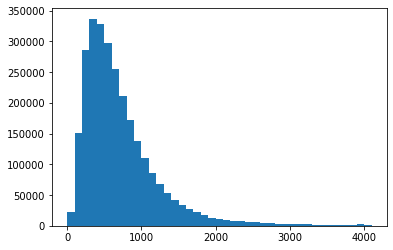

In [344]:
bin_edges = np.arange(0, df_clean['duration_sec'].max()+100, 100)
plt.hist(df_clean['duration_sec'], bins = bin_edges);
#plt.xlim(0,2000) #Adjusting the bins to 6000 sec (100 min)

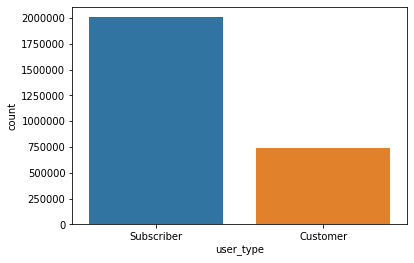

In [372]:
sns.countplot(data=df_clean,x='user_type')

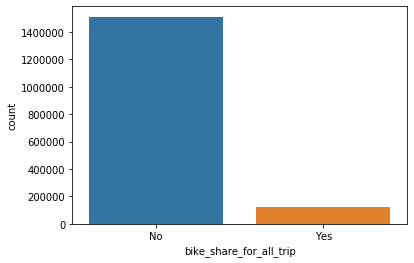

In [128]:
sns.countplot(data=df_clean,x='bike_share_for_all_trip')

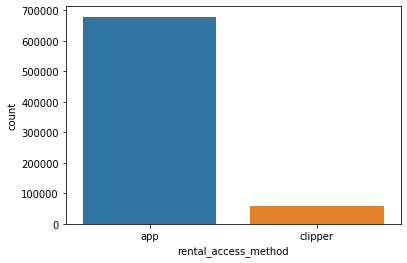

In [284]:
sns.countplot(data=df_clean,x='rental_access_method')

In [349]:
stations=df_clean['start_station_id'].value_counts().rename_axis('start_station_id').reset_index(name='counts')
station_10=stations.head(10)
station_10

,start_station_id,counts
0,58.0,39441
1,81.0,39293
2,30.0,38540
3,15.0,32798
4,21.0,30365
5,16.0,29051
6,3.0,29037
7,22.0,28695
8,5.0,26528
9,67.0,24392


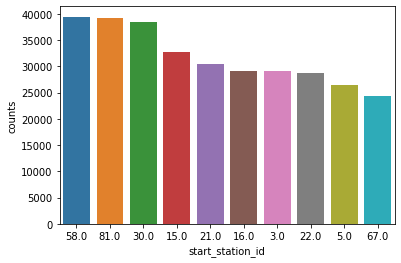

In [350]:
sns.barplot(data=station_10,x='start_station_id',y='counts', order=station_10.start_station_id)

In [351]:
stations_end=df_clean['end_station_id'].value_counts().rename_axis('end_station_id').reset_index(name='counts')
station_10_end=stations_end.head(10)
station_10_end

,end_station_id,counts
0,30.0,54855
1,21.0,43460
2,15.0,42311
3,81.0,39680
4,58.0,38672
5,67.0,34840
6,3.0,32871
7,16.0,30188
8,5.0,27664
9,22.0,27458


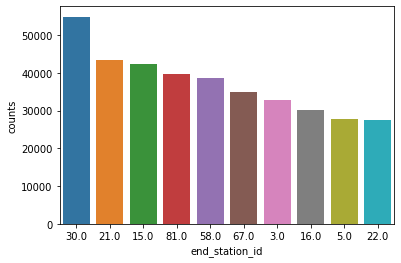

In [352]:
sns.barplot(data=station_10_end,x='end_station_id',y='counts', order=station_10_end.end_station_id)

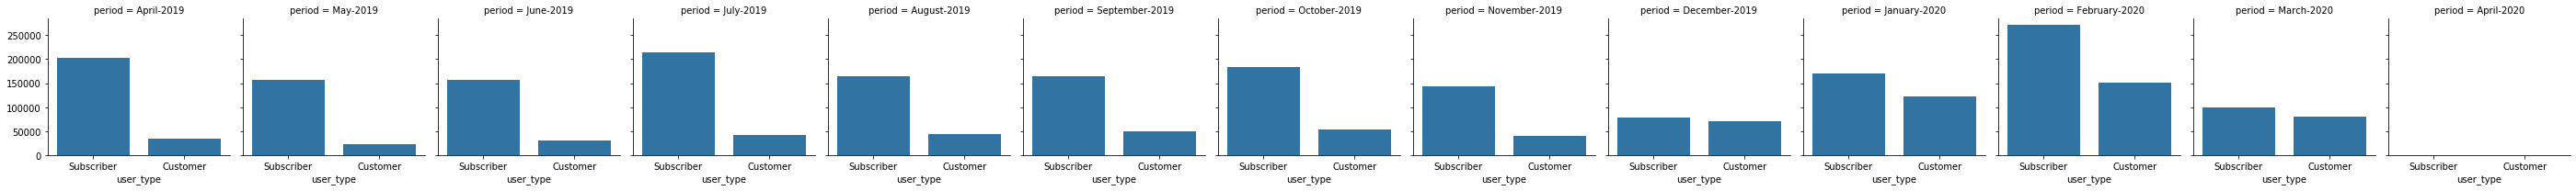

In [353]:
g = sns.FacetGrid(data = df_clean, col = 'period', )
g.map(sns.countplot,'user_type', order=['Subscriber','Customer'])

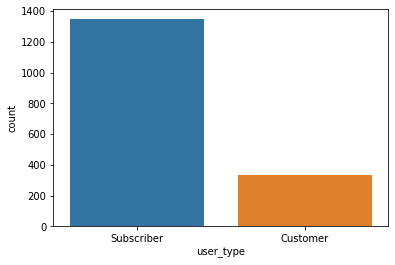

In [375]:
sns.countplot(x=df_clean[df_clean['period']=='April-2020'].user_type, order=['Subscriber','Customer'])

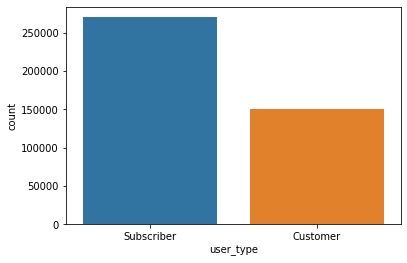

In [374]:
sns.countplot(x=df_clean[df_clean['period']=='February-2020'].user_type, order=['Subscriber','Customer'])

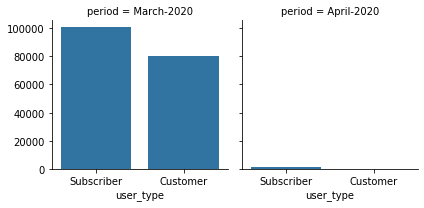

In [360]:
subset = df_clean[(df_clean['period']=='March-2020') | (df_clean['period']=='April-2020')].copy()
g = sns.FacetGrid(data = subset, col = 'period' )
g.map(sns.countplot,'user_type', order=['Subscriber','Customer'])

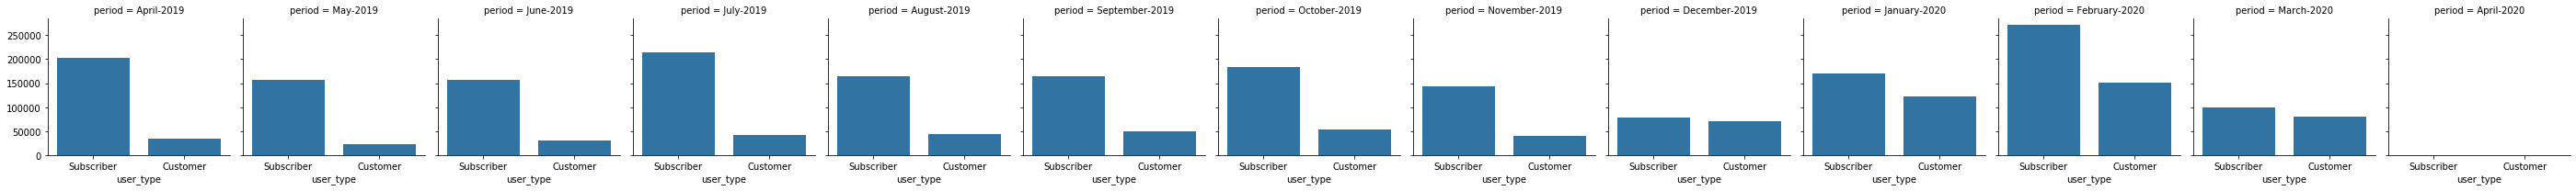

In [353]:
g = sns.FacetGrid(data = df_clean, col = 'period' )
g.map(sns.countplot,'user_type', order=['Subscriber','Customer'])

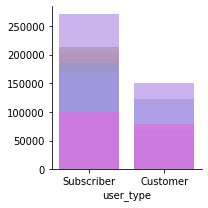

In [371]:
g = sns.FacetGrid(data = df_clean, hue = 'period', )
g.map(sns.countplot,'user_type',alpha=0.7,order=['Subscriber','Customer'])
#plt.legend()

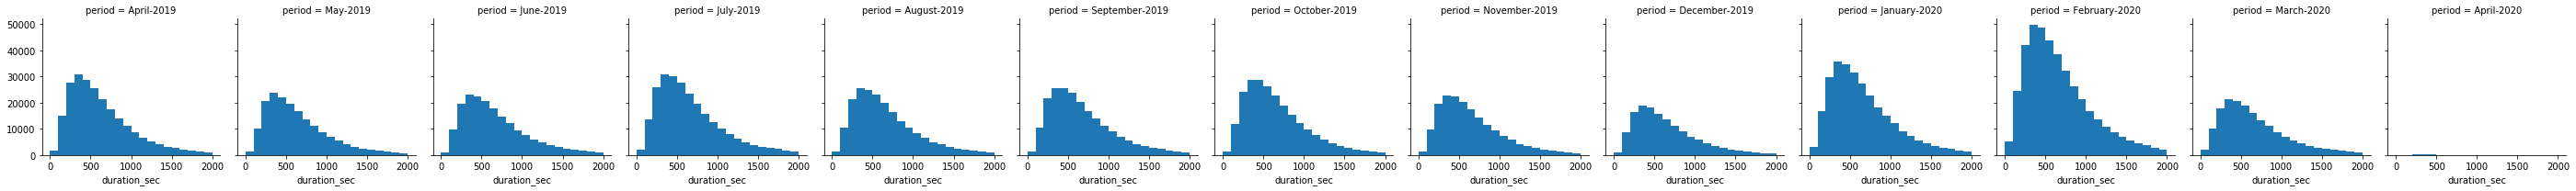

In [251]:
bin_edges = np.arange(0, 2000+100, 100)

g = sns.FacetGrid(data = df_clean, col = 'period', )
g.map(plt.hist,'duration_sec',bins=bin_edges)
#plt.xlim(0,5000)

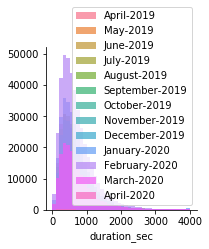

In [367]:
bin_edges = np.arange(0, 4000+100, 100)

g = sns.FacetGrid(data = df_clean, hue = 'period')
g.map(plt.hist,'duration_sec',alpha=0.7,bins=bin_edges)
#plt.xlim(0,5000)
plt.legend()

In [ ]:
bin_edges = np.arange(0, 2000+100, 100)
plt.hist(df_clean['duration_sec'], bins = bin_edges, );

In [262]:
df_clean[df_clean.period=='April-2020'].describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,month_start,year
count,1732.000000,721.000000,1732.000000,1732.000000,718.000000,1732.000000,1732.000000,1732.000000,1732.0,1732.0
mean,1020.051963,216.957004,37.666939,-122.288747,206.339833,37.666825,-122.288962,543143.975751,4.0,2020.0
std,1264.145745,176.928084,0.190531,0.229796,175.181671,0.190726,0.230015,244338.757526,0.0,0.0
min,60.000000,3.000000,37.277431,-122.512242,3.000000,37.277689,-122.511730,100731.000000,4.0,2020.0
25%,368.000000,61.000000,37.720679,-122.424428,58.000000,37.719873,-122.424346,353720.250000,4.0,2020.0
50%,650.500000,126.000000,37.769757,-122.408902,120.000000,37.769757,-122.409335,529670.000000,4.0,2020.0
75%,1156.250000,387.000000,37.783157,-122.384997,380.750000,37.782611,-122.380961,737125.000000,4.0,2020.0
max,21372.000000,521.000000,37.848530,-121.811569,521.000000,37.848602,-121.799675,999960.000000,4.0,2020.0


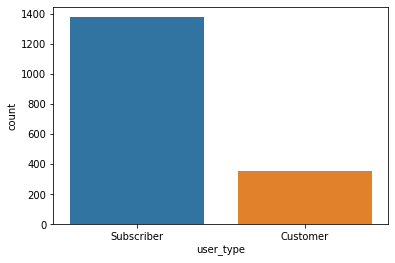

In [257]:
sns.countplot(x=df_clean[df_clean.period=='April-2020'].user_type)

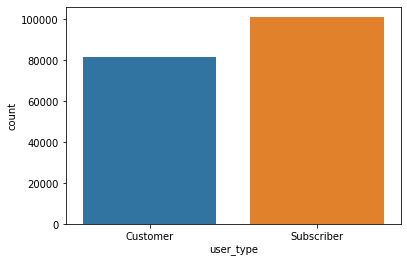

In [258]:
sns.countplot(x=df_clean[df_clean.period=='March-2020'].user_type)

In [137]:
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,month_start
count,2.780197e+06,2.213827e+06,2.780197e+06,2.780197e+06,2.212179e+06,2.780197e+06,2.780197e+06,2.780197e+06,2.780197e+06
mean,8.166443e+02,1.544218e+02,3.775789e+01,-1.223509e+02,1.494351e+02,3.775695e+01,-1.223467e+02,1.365178e+05,5.903132e+00
std,1.899538e+03,1.300140e+02,1.783507e-01,4.679862e-01,1.289548e+02,2.707893e-01,8.093102e-01,2.511721e+05,3.491786e+00
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225758e+02,4.000000e+00,1.000000e+00
25%,3.690000e+02,5.000000e+01,3.776710e+01,-1.224167e+02,4.300000e+01,3.776811e+01,-1.224147e+02,2.299000e+03,2.000000e+00
50%,5.880000e+02,1.090000e+02,3.777874e+01,-1.224000e+02,1.040000e+02,3.777877e+01,-1.223991e+02,9.787000e+03,6.000000e+00
75%,9.150000e+02,2.470000e+02,3.779423e+01,-1.223898e+02,2.440000e+02,3.779455e+01,-1.223898e+02,1.514520e+05,9.000000e+00
max,9.121100e+05,5.210000e+02,4.551000e+01,0.000000e+00,5.210000e+02,4.551000e+01,0.000000e+00,9.999600e+05,1.200000e+01


In [ ]:
# adapted from https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
def distance_cal (start_latitude, start_longitude,end_latitude, end_longitude):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(start_latitude)
    lon1 = radians(start_longitude)
    lat2 = radians(end_latitude)
    lon2 = radians(end_longitude)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance*1000

In [55]:
distance_cal(37.778768,-122.415929,37.796471,-122.416858)

1970.7943572878055

In [ ]:
lat1 = radians(52.2296756)
lon1 = radians(21.0122287)
lat2 = radians(52.406374)
lon2 = radians(16.9251681)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-null  object 
dtypes: f

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!